In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
train_features = 'train_features.csv'
train_labels = 'train_salaries.csv'
test_features = 'test_features.csv'

In [3]:
features_df = pd.read_csv(train_features)
labels_df = pd.read_csv(train_labels)
test_df = pd.read_csv(test_features)

In [4]:
print("Train Features shape - {}".format(features_df.shape))
print("Train Labels shape - {}".format(labels_df.shape))
print("Test Features shape - {}".format(test_df.shape))

Train Features shape - (1000000, 8)
Train Labels shape - (1000000, 2)
Test Features shape - (1000000, 8)


In [5]:
train_df = pd.merge(features_df, labels_df, on='jobId', how='outer')

In [6]:
train_df['Type'] = 'Train'

In [7]:
print("Train Features shape - {}".format(train_df.shape))

Train Features shape - (1000000, 10)


In [8]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,Type
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,Train
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,Train
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,Train
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,Train
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,Train


In [9]:
test_df['salary'] = 0
test_df['Type'] = 'Test'

In [10]:
test_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,Type
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73,0,Test
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47,0,Test
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9,0,Test
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96,0,Test
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44,0,Test


In [86]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
Type                   1000000 non-null object
dtypes: int64(3), object(7)
memory usage: 76.3+ MB


In [87]:
test_train_df = pd.concat([test_df, train_df], sort=False)

In [88]:
test_train_df.shape

(2000000, 10)

In [89]:
test_train_df['Type'].value_counts()

Test     1000000
Train    1000000
Name: Type, dtype: int64

In [90]:
expanded_df = pd.get_dummies(test_train_df, columns=['jobType', 'degree', 'major', 'industry'])

# expanded_df = pd.get_dummies(test_train_df, columns=['jobType', 'degree', 'industry'])
expanded_df.drop(['jobId', 'companyId'], axis=1, inplace=True)

In [91]:
expanded_df.head()

,yearsExperience,milesFromMetropolis,salary,Type,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,22,73,0,Test,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,20,47,0,Test,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2,17,9,0,Test,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,14,96,0,Test,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,10,44,0,Test,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [92]:
expanded_df.columns

Index(['yearsExperience', 'milesFromMetropolis', 'salary', 'Type',
       'jobType_CEO', 'jobType_CFO', 'jobType_CTO', 'jobType_JANITOR',
       'jobType_JUNIOR', 'jobType_MANAGER', 'jobType_SENIOR',
       'jobType_VICE_PRESIDENT', 'degree_BACHELORS', 'degree_DOCTORAL',
       'degree_HIGH_SCHOOL', 'degree_MASTERS', 'degree_NONE', 'major_BIOLOGY',
       'major_BUSINESS', 'major_CHEMISTRY', 'major_COMPSCI',
       'major_ENGINEERING', 'major_LITERATURE', 'major_MATH', 'major_NONE',
       'major_PHYSICS', 'industry_AUTO', 'industry_EDUCATION',
       'industry_FINANCE', 'industry_HEALTH', 'industry_OIL',
       'industry_SERVICE', 'industry_WEB'],
      dtype='object')

In [93]:
expanded_df['Type'].value_counts()

Test     1000000
Train    1000000
Name: Type, dtype: int64

In [94]:
new_train_df = expanded_df[expanded_df['Type'] == 'Train']
new_test_df = expanded_df[expanded_df['Type'] == 'Test']

In [95]:
target = new_train_df['salary']

In [96]:
new_test_df.drop(['salary', 'Type',], axis=1, inplace=True)
new_train_df.drop(['salary', 'Type'], axis=1, inplace=True)

# new_test_df.drop(['salary', 'Type', 'major'], axis=1, inplace=True)
# new_train_df.drop(['salary', 'Type', 'major'], axis=1, inplace=True)

In [97]:
print("Train Features shape - {}".format(new_train_df.shape))
print("Train Labels shape - {}".format(target.shape))
print("Test Features shape - {}".format(new_test_df.shape))

Train Features shape - (1000000, 31)
Train Labels shape - (1000000,)
Test Features shape - (1000000, 31)


In [98]:
new_train_df.head()

,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,73,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,10,38,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,8,17,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,16,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [99]:
new_train_df.head()

,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,73,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,10,38,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,8,17,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,16,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [108]:
def rmse(y_true, y_pred):
    from keras import backend
    return np.abs(backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1)))

# mean squared error (mse) for regression  (only for Keras tensors)
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [111]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
from keras import metrics

checkpoint = ModelCheckpoint(filepath='my_model.h5', verbose=1, save_best_only=True)
#sgd = SGD(lr=0.01, clipnorm=1.)

model = Sequential()
model.add(Dense(16, input_shape=(31,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.summary()

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[metrics.mae, metrics.mean_squared_logarithmic_error])

history = model.fit(new_train_df, target, epochs=100, batch_size=32, verbose=1, callbacks=[checkpoint], validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 16)                512       
_________________________________________________________________
dense_107 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_108 (Dense)            (None, 8)                 264       
_________________________________________________________________
dense_109 (Dense)            (None, 1)                 9         
Total params: 1,329
Trainable params: 1,329
Non-trainable params: 0
_________________________________________________________________
Train on 800000 samples, validate on 200000 samples
Epoch 1/100
800000/800000 [==============================] - 64s 81us/step - loss: 449.8085 - mean_absolute_error: 16.4321 - mean_squared_logarithmic_error: 0.0441 - val_loss: 371.5505 - val_mean_absolute_error: 15.6129 

800000/800000 [==============================] - 69s 86us/step - loss: 358.0858 - mean_absolute_error: 15.3685 - mean_squared_logarithmic_error: 0.0249 - val_loss: 357.4548 - val_mean_absolute_error: 15.3623 - val_mean_squared_logarithmic_error: 0.0254

Epoch 00022: val_loss did not improve from 353.47072
Epoch 23/100
800000/800000 [==============================] - 65s 81us/step - loss: 358.1201 - mean_absolute_error: 15.3700 - mean_squared_logarithmic_error: 0.0249 - val_loss: 354.2486 - val_mean_absolute_error: 15.2735 - val_mean_squared_logarithmic_error: 0.0247

Epoch 00023: val_loss did not improve from 353.47072
Epoch 24/100
800000/800000 [==============================] - 65s 82us/step - loss: 358.0662 - mean_absolute_error: 15.3695 - mean_squared_logarithmic_error: 0.0249 - val_loss: 354.0124 - val_mean_absolute_error: 15.2904 - val_mean_squared_logarithmic_error: 0.0250

Epoch 00024: val_loss did not improve from 353.47072
Epoch 25/100
800000/800000 [=========================

800000/800000 [==============================] - 61s 76us/step - loss: 357.0751 - mean_absolute_error: 15.3498 - mean_squared_logarithmic_error: 0.0248 - val_loss: 353.1549 - val_mean_absolute_error: 15.2629 - val_mean_squared_logarithmic_error: 0.0248

Epoch 00047: val_loss did not improve from 353.00824
Epoch 48/100
800000/800000 [==============================] - 58s 72us/step - loss: 357.0343 - mean_absolute_error: 15.3488 - mean_squared_logarithmic_error: 0.0248 - val_loss: 354.6094 - val_mean_absolute_error: 15.2778 - val_mean_squared_logarithmic_error: 0.0246

Epoch 00048: val_loss did not improve from 353.00824
Epoch 49/100
800000/800000 [==============================] - 63s 78us/step - loss: 356.9608 - mean_absolute_error: 15.3476 - mean_squared_logarithmic_error: 0.0248 - val_loss: 353.1834 - val_mean_absolute_error: 15.2564 - val_mean_squared_logarithmic_error: 0.0247

Epoch 00049: val_loss did not improve from 353.00824
Epoch 50/100
800000/800000 [=========================

800000/800000 [==============================] - 67s 84us/step - loss: 356.7078 - mean_absolute_error: 15.3439 - mean_squared_logarithmic_error: 0.0248 - val_loss: 356.9907 - val_mean_absolute_error: 15.3115 - val_mean_squared_logarithmic_error: 0.0247

Epoch 00072: val_loss did not improve from 353.00824
Epoch 73/100
800000/800000 [==============================] - 65s 81us/step - loss: 356.6528 - mean_absolute_error: 15.3417 - mean_squared_logarithmic_error: 0.0248 - val_loss: 355.4159 - val_mean_absolute_error: 15.3130 - val_mean_squared_logarithmic_error: 0.0251

Epoch 00073: val_loss did not improve from 353.00824
Epoch 74/100
800000/800000 [==============================] - 64s 81us/step - loss: 356.6326 - mean_absolute_error: 15.3408 - mean_squared_logarithmic_error: 0.0248 - val_loss: 353.3309 - val_mean_absolute_error: 15.2589 - val_mean_squared_logarithmic_error: 0.0247

Epoch 00074: val_loss did not improve from 353.00824
Epoch 75/100
800000/800000 [=========================

800000/800000 [==============================] - 73s 91us/step - loss: 356.4652 - mean_absolute_error: 15.3394 - mean_squared_logarithmic_error: 0.0248 - val_loss: 354.6162 - val_mean_absolute_error: 15.2676 - val_mean_squared_logarithmic_error: 0.0246

Epoch 00097: val_loss did not improve from 352.99925
Epoch 98/100
800000/800000 [==============================] - 75s 94us/step - loss: 356.4434 - mean_absolute_error: 15.3386 - mean_squared_logarithmic_error: 0.0248 - val_loss: 354.4057 - val_mean_absolute_error: 15.2799 - val_mean_squared_logarithmic_error: 0.0248

Epoch 00098: val_loss did not improve from 352.99925
Epoch 99/100
800000/800000 [==============================] - 73s 92us/step - loss: 356.4426 - mean_absolute_error: 15.3392 - mean_squared_logarithmic_error: 0.0248 - val_loss: 354.1581 - val_mean_absolute_error: 15.2663 - val_mean_squared_logarithmic_error: 0.0246_absolute_error: 15.3401 - me

Epoch 00099: val_loss did not improve from 352.99925
Epoch 100/100
800000/800

In [112]:
hist.history.keys()

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])

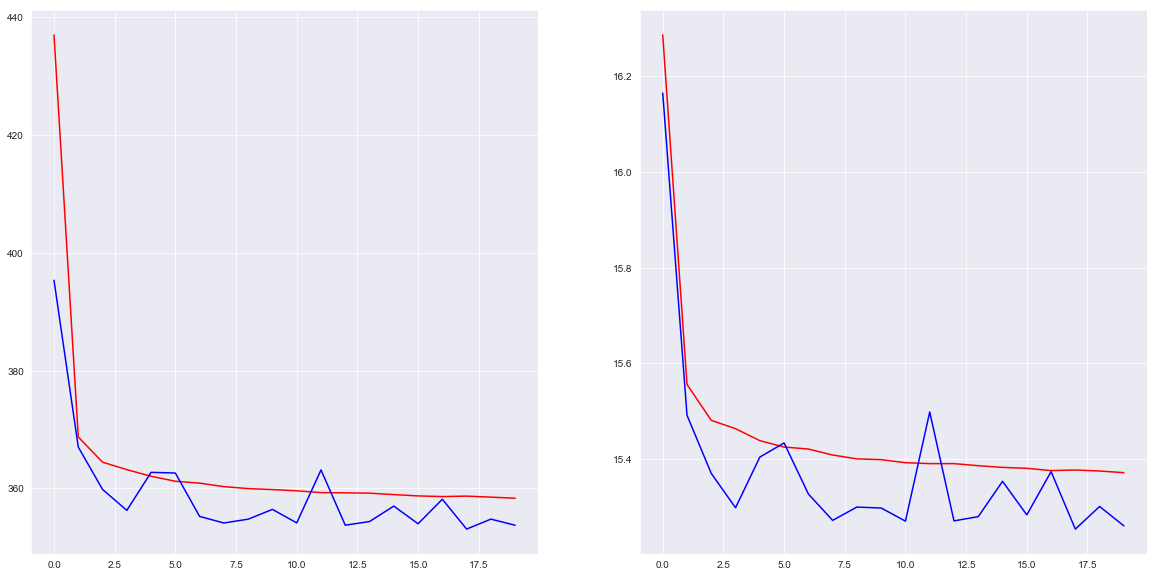

In [113]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(hist.history['loss'], color='r')
ax1.plot(hist.history['val_loss'], color='b')

ax2.plot(hist.history['mean_absolute_error'], color='r')
ax2.plot(hist.history['val_mean_absolute_error'], color='b')

In [114]:
from keras.models import load_model

model = load_model('my_model.h5')

In [117]:
new_test_df.head()

,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,22,73,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,20,47,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,17,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,14,96,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,10,44,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [118]:
test_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,Type
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73,0,Test
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47,0,Test
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9,0,Test
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96,0,Test
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44,0,Test


In [116]:
pred = model.predict(new_test_df)

In [119]:
submission = pd.DataFrame()
submission['jobId'] = test_df['jobId']
submission['salary'] = pred

In [120]:
submission.shape

(1000000, 2)

In [121]:
submission.head()

,jobId,salary
0,JOB1362685407687,111.525330
1,JOB1362685407688,92.015152
2,JOB1362685407689,182.156021
3,JOB1362685407690,104.109192
4,JOB1362685407691,115.203308


In [122]:
submission.to_csv('test_salaries.csv', index=False)